In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV

In [59]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [60]:
iris_feature_En='sepal length','sepal width','petal length','petal width'
iris_feature_Ch='花萼长度','花萼宽度','花瓣长度','花瓣宽度'
iris_class='Iris-setosa','Iris-versicolor','Iris-virginica'
names='sepal length','sepal width','petal length','petal width','class'

# 读取数据

In [61]:
data=pd.read_csv('datas/iris.data',names=names)
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
# 抽取属性x和类别y
x=data.iloc[:,0:4]
y=data.iloc[:,-1]

print(x.head())
print(y.head())
y.value_counts()

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object


Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [64]:
# 数据预处理
y=pd.Categorical(data['class']).codes
print("总样本数目: %d ;特征属性数目: %d" % x.shape)

总样本数目: 150 ;特征属性数目: 4


In [98]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：120, 测试数据集样本数目：30


In [99]:
ss = MinMaxScaler()

x_train = ss.fit_transform(x_train, y_train)
x_test = ss.transform(x_test)

print ("原始数据各个特征属性的调整最小值:",ss.min_)
print ("原始数据各个特征属性的缩放数据值:",ss.scale_)

原始数据各个特征属性的调整最小值: [-1.19444444 -0.83333333 -0.18965517 -0.04166667]
原始数据各个特征属性的缩放数据值: [0.27777778 0.41666667 0.17241379 0.41666667]


# 如果做到的?怎么选取的?


In [100]:
# ch2?是啥?
ch2=SelectKBest(chi2,k=3)
x_train=ch2.fit_transform(x_train,y_train)
x_test=ch2.transform(x_test)

select_name_index=ch2.get_support(indices=True)
print('对类别判断影响最大的三个特征属性分布是:',ch2.get_support(indices=False))

对类别判断影响最大的三个特征属性分布是: [ True False  True  True]


In [101]:
pca = PCA(n_components=2) # PCA一种降维手段

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [102]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5)

model.fit(x_train, y_train)

y_test_hat = model.predict(x_test) 

In [103]:
y_test2=y_test.reshape(-1)
result=(y_test2==y_test_hat)
print("准确率:%.2f%%" %(np.mean(result*100)))
print("Score: ",model.score(x_test,y_test))

print('Classes:',model.classes_)

准确率:96.67%
Score:  0.9666666666666667
Classes: [0 1 2]


In [104]:
N = 100  
x1_min = np.min((x_train.T[0].min(), x_test.T[0].min()))
x1_max = np.max((x_train.T[0].max(), x_test.T[0].max()))
x2_min = np.min((x_train.T[1].min(), x_test.T[1].min()))
x2_max = np.max((x_train.T[1].max(), x_test.T[1].max()))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0] 

y_show_hat = model.predict(x_show) 

y_show_hat = y_show_hat.reshape(x1.shape)  
print (y_show_hat.shape)
y_show_hat[0]

(100, 100)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

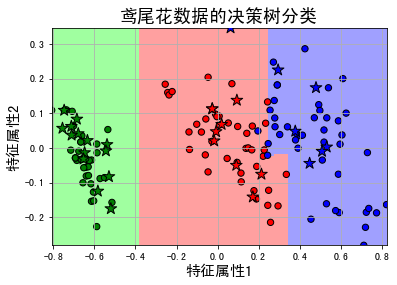

In [105]:
plt_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=plt_light) 
plt.scatter(x_test.T[0], x_test.T[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=plt_dark, marker='*')  # 测试数据
plt.scatter(x_train.T[0], x_train.T[1], c=y_train.ravel(), edgecolors='k', s=40, cmap=plt_dark)  # 全部数据
plt.xlabel(u'特征属性1', fontsize=15)
plt.ylabel(u'特征属性2', fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=18)
plt.show()

In [107]:
pipe = Pipeline([
            ('mms', MinMaxScaler()),
            ('skb', SelectKBest(chi2)),
            ('pca', PCA()),
            ('decision', DecisionTreeClassifier())
        ])

# 参数
parameters = {
    "skb__k": [2,3,4],
    "pca__n_components": [0.5,1],
    "decision__criterion": ["gini", "entropy"],
    "decision__max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

x_train2, x_test2, y_train2, y_test2 = x_train1, x_test1, y_train1, y_test1

gscv = GridSearchCV(pipe, param_grid=parameters)

gscv.fit(x_train2, y_train2)

print("最优参数列表:",gscv.best_params_)
print ("score值：",gscv.best_score_)

y_test_hat2 = gscv.predict(x_test2)

最优参数列表: {'decision__criterion': 'gini', 'decision__max_depth': 2, 'pca__n_components': 0.5, 'skb__k': 2}
score值： 0.9333333333333333


In [108]:
mms_best = MinMaxScaler()
skb_best = SelectKBest(chi2, k=2)
pca_best = PCA(n_components=0.5)
decision3 = DecisionTreeClassifier(criterion='gini', max_depth=2)

x_train3, x_test3, y_train3, y_test3 = x_train1, x_test1, y_train1, y_test1
x_train3 = pca_best.fit_transform(skb_best.fit_transform(mms_best.fit_transform(x_train3, y_train3), y_train3))
x_test3 = pca_best.transform(skb_best.transform(mms_best.transform(x_test3)))
decision3.fit(x_train3, y_train3)


print ("正确率:", decision3.score(x_test3, y_test3))

正确率: 1.0


1深度，正确率0.55556
2深度，正确率0.73333
3深度，正确率0.77778
4深度，正确率0.73333
5深度，正确率0.68889
6深度，正确率0.68889
7深度，正确率0.68889
8深度，正确率0.66667
9深度，正确率0.66667
10深度，正确率0.66667
11深度，正确率0.66667
12深度，正确率0.66667
13深度，正确率0.66667
14深度，正确率0.66667


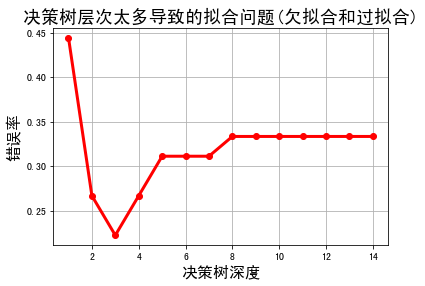

In [110]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x.iloc[:, :2], y, test_size=0.3, random_state=14)

depths = np.arange(1, 15)
err_list = []
for d in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=d)
    clf.fit(x_train4, y_train4)
    
    score = clf.score(x_test4, y_test4)
    err = 1 - score
    err_list.append(err)
    print ("%d深度，正确率%.5f" % (d, score))

## 画图
plt.figure(facecolor='w')
plt.plot(depths, err_list, 'ro-', lw=3)
plt.xlabel(u'决策树深度', fontsize=16)
plt.ylabel(u'错误率', fontsize=16)
plt.grid(True)
plt.title(u'决策树层次太多导致的拟合问题(欠拟合和过拟合)', fontsize=18)
plt.show()